In [1]:
#!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

In [2]:
# !unzip /content/toronto-emotional-speech-set-tess.zip

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
from keras import utils
warnings.filterwarnings('ignore')

In [38]:
paths =[]
labels = []

In [39]:
for dirname, _, filenames in os.walk('\\sppeech recognition\\TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is loaded')
len(paths)

Dataset is loaded


2800

In [40]:
print(paths[:])

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_make_fear.wav', '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_tough_fear.wav', '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_join_fear.wav', '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_wife_fear.wav', '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_nag_fear.wav', '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_time_fear.wav', '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_read_fear.wav', '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_base_fear.wav', '/content/tess toronto emotional speech set data/TESS Toronto e

In [75]:
#creating data frame
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()


,speech,label
0,/content/tess toronto emotional speech set dat...,fear
1,/content/tess toronto emotional speech set dat...,fear
2,/content/tess toronto emotional speech set dat...,fear
3,/content/tess toronto emotional speech set dat...,fear
4,/content/tess toronto emotional speech set dat...,fear
...,...,...
2795,/content/tess toronto emotional speech set dat...,angry
2796,/content/tess toronto emotional speech set dat...,angry
2797,/content/tess toronto emotional speech set dat...,angry
2798,/content/tess toronto emotional speech set dat...,angry


In [78]:
labels[::800]

['fear', 'sad', 'neutral', 'happy']

<Axes: ylabel='count'>

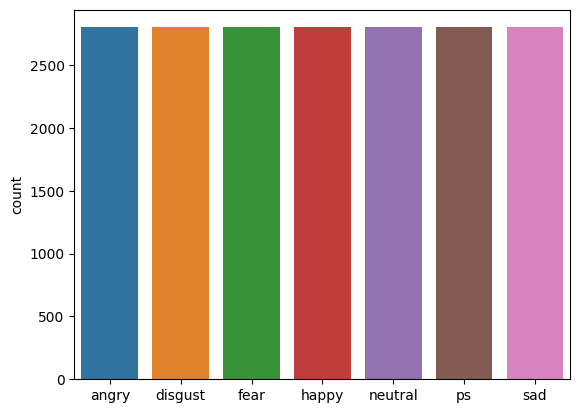

In [42]:
one_hot_encoded = pd.get_dummies(df['label'])
sns.countplot(data=one_hot_encoded)

<Axes: xlabel='label', ylabel='count'>

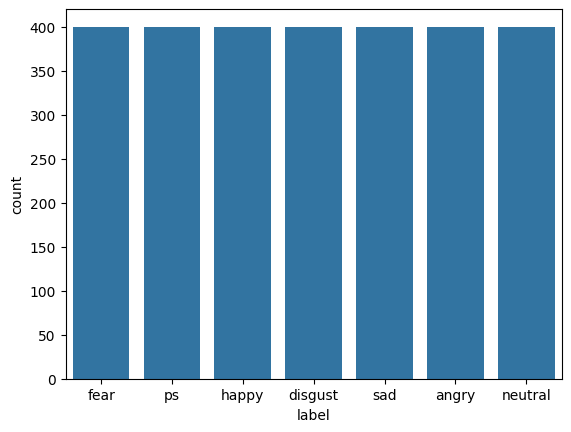

In [43]:
sns.countplot(data=df, x='label')

In [44]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion,size=20 )
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()



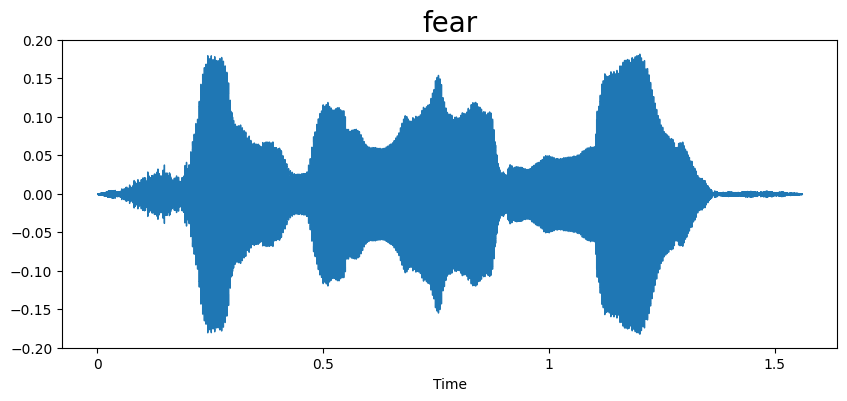

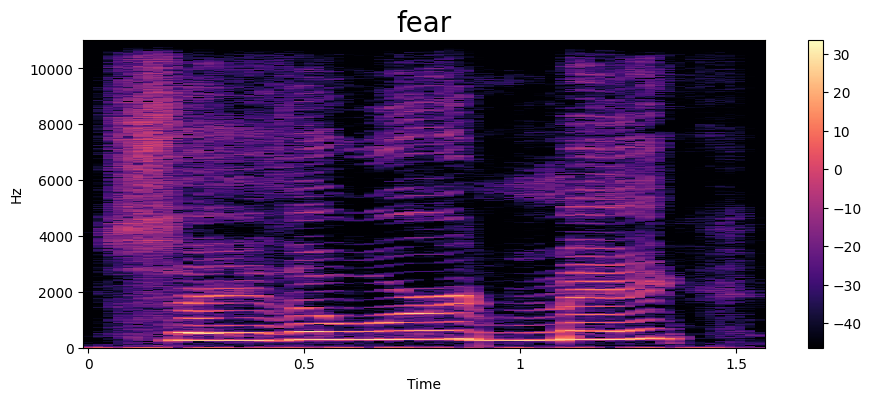

In [45]:
emotion='fear'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

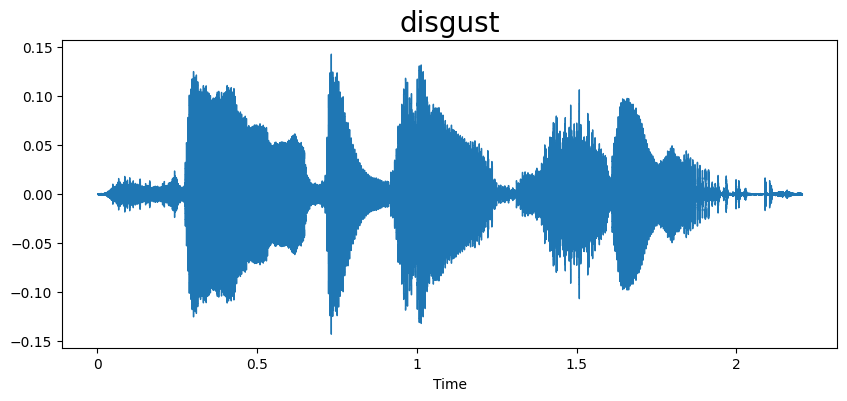

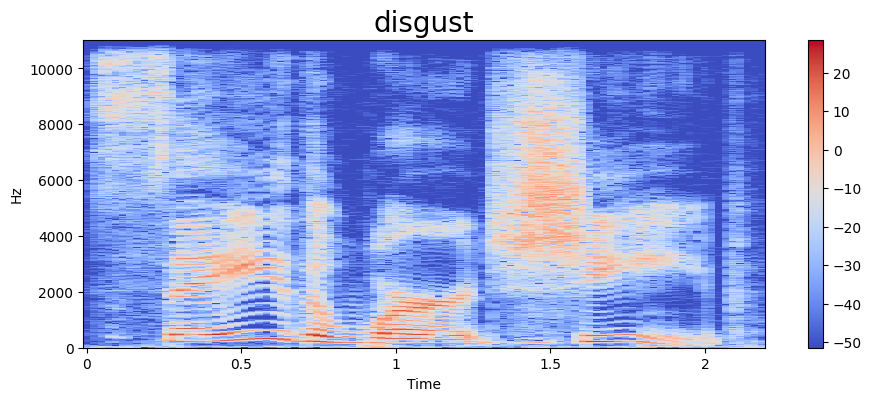

In [72]:
emotion='disgust'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [58]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename,duration=3,offset=0.5)
    mfcc = np.std(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)

    return mfcc


In [59]:
extract_mfcc(df['speech'][1])

array([128.31883  ,  39.512352 ,  21.71707  ,  30.262852 ,  28.821642 ,
        19.36728  ,  15.654736 ,  22.409534 ,  16.166237 ,  14.2311535,
        18.071423 ,  11.995497 ,  13.272709 ,  11.362558 ,  12.305721 ,
         8.572664 ,   8.390788 ,  11.350608 ,  10.089386 ,  15.818006 ,
        14.3185215,  17.714493 ,  17.13318  ,  21.906513 ,  18.511467 ,
        14.901081 ,  11.315755 ,   8.913964 ,   9.737841 ,   8.530719 ,
         7.2281837,   9.413584 ,   6.912368 ,   8.779074 ,   7.867495 ,
         5.948733 ,   8.94692  ,   7.045321 ,   7.4330664,   6.4385376],
      dtype=float32)

In [60]:
X_mfcc=df['speech'].apply(lambda x: extract_mfcc(x)) # this code is fetching mean of every individaul

In [61]:
X_mfcc

,speech
0,"[90.69983, 35.3631, 22.119637, 28.165579, 19.6..."
1,"[128.31883, 39.512352, 21.71707, 30.262852, 28..."
2,"[119.14507, 31.35844, 25.737173, 29.021164, 28..."
3,"[82.14328, 44.363583, 21.288712, 31.34736, 25...."
4,"[84.551605, 26.248852, 26.686714, 31.401676, 1..."
...,...
2795,"[90.700165, 70.12348, 46.755318, 36.83104, 21...."
2796,"[96.077515, 42.329453, 30.380114, 44.17439, 21..."
2797,"[107.68251, 41.468227, 28.138407, 43.387024, 3..."
2798,"[128.49544, 40.90322, 22.608677, 42.543766, 23..."


In [62]:
X=np.array(X_mfcc.tolist())
X.shape

(2800, 40)

In [63]:
X=np.expand_dims(X,-1)
print(X.dtype)
X.shape

float32


(2800, 40, 1)

In [64]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y =enc.fit_transform(df[['label']])

In [65]:
y = y.toarray()

In [66]:
y.shape

(2800, 7)

In [67]:
from keras.models import Sequential
from keras.layers import Dense ,LSTM, Dropout
model= Sequential([
    LSTM(123,return_sequences=False , input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 123)                 │          61,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
history = model.fit(X, y, validation_split=0.2, epochs=120, batch_size=512, shuffle=True)

Epoch 1/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 317ms/step - accuracy: 0.1320 - loss: 2.0129 - val_accuracy: 0.0000e+00 - val_loss: 2.0089
Epoch 2/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 403ms/step - accuracy: 0.2009 - loss: 1.9222 - val_accuracy: 0.0000e+00 - val_loss: 2.0427
Epoch 3/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - accuracy: 0.2151 - loss: 1.8902 - val_accuracy: 0.0000e+00 - val_loss: 2.0834
Epoch 4/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step - accuracy: 0.2369 - loss: 1.8283 - val_accuracy: 0.0000e+00 - val_loss: 2.0958
Epoch 5/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - accuracy: 0.2686 - loss: 1.7543 - val_accuracy: 0.0000e+00 - val_loss: 2.1048
Epoch 6/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 0.3695 - loss: 1.6439 - val_accuracy: 0.0000e+00 - val_loss: 2.1085
Epoch 7/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.4494 - loss: 1.5060 - val_accuracy: 0.0000e+00 - val_loss: 2.2563
Epoch 8/120
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - accuracy: 0.5003 - loss: 1.395

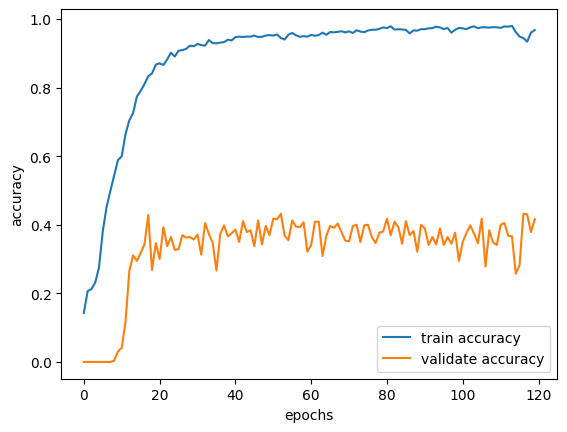

In [71]:
epochs=list(range(120))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='validate accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()